In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import numpy as np
from astroquery.exoplanet_orbit_database import ExoplanetOrbitDatabase
import astropy.units as u

In [2]:
table = ExoplanetOrbitDatabase.get_table(cache=True)

In [3]:
# Make some cuts!

impact_parameter_cuts = (table['B'] < 0.8) & (table['B'] > 0) & np.logical_not(table['B'].mask)
teff_cuts = (table['TEFF'] < 6100*u.K) & (table['TEFF'] > 5500*u.K) & np.logical_not(table['TEFF'].mask)
kepler_cut = np.logical_not(table['KEPID'].mask)

all_cuts = impact_parameter_cuts & teff_cuts & kepler_cut

cut_table = table[all_cuts]

161


(array([  34.,  119.,  353.,  153.,   20.,    8.,   12.,    2.,    6.,    5.]),
 array([-5.72423535, -4.22168416, -2.71913297, -1.21658179,  0.2859694 ,
         1.78852058,  3.29107177,  4.79362296,  6.29617414,  7.79872533,
         9.30127651]),
 <a list of 10 Patch objects>)

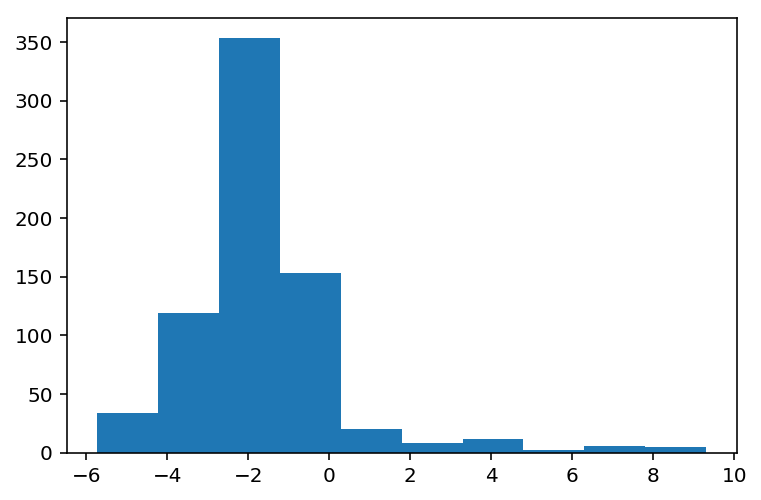

In [10]:
score = cut_table['DEPTH'] * cut_table['T14'] / cut_table['KP'] / cut_table['PER']

high_score_targets = np.log(score) > -1

print(np.count_nonzero(high_score_targets))
plt.hist(np.log(score))

In [14]:
from astropy.io import ascii

ascii.write(cut_table[high_score_targets]['KEPID'], 'data/kics.csv')